In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import io
import glob
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import imblearn
import tpot
from tpot import TPOTClassifier
from sklearn.pipeline import Pipeline
%matplotlib inline

C:\Users\P2773714\Anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
#Dispaly all columns for better in-line visuals of tables
pd.options.display.max_columns = None

In [3]:
#Dispaly all rows for better in-line visuals of tables
pd.options.display.max_rows = None

In [4]:
#Read in master file
df = pd.read_csv('df_master.csv', index_col=False, header=0)#, usecols=fields)


C:\Users\P2773714\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15,16,27,28,60) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.head()

,amount_borrowed,borrower_rate,prosper_rating,term,age_in_months,origination_date,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,ListingCategoryName,FICORange,ScorexRange,listing_amount,amount_remaining,percent_funded,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,scorex,fico_score,prosper_score,listing_category_id,income_range,income_range_description,stated_monthly_income,dti_wprosper_loan,employment_status_description,occupation,months_employed,borrower_state,borrower_city,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,first_recorded_credit_line,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,investment_type_description,Default_Flag,Completed_Flag
0,4800.0,0.1248,E,36,167,2007-03-29 00:00:00,0,0.00,-74.19,4800.00,925.92,0.0,0.0,0.0,Not Available,NaN,640-659,4800.0,0.0,1.0,1.0,-0.1452,0.130,0.1148,-0.0152,0.13182,160.53,640-649,NaN,6.0,0.0,3.0,"$25,000-49,999",3330.1667,0.23,Full-time,Other,54.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,607.0,0.0,1.0,0.0,0.0,1998-08-19 00:00:00,17.0,1.0,0.0,9.0,9.0,0.89,8.0,19018.0,0.0,7936.0,0.0,31.0,2.0,17.0,15.0,0.0,2.0,3.0,1.0,1.0,Fractional,0,1
1,25000.0,0.1794,HR,36,167,2007-03-29 00:00:00,3926,16883.81,-250.24,8116.18,4489.46,0.0,0.0,0.0,Not Available,NaN,660-679,25000.0,0.0,1.0,1.0,-0.4906,0.330,0.1694,-0.1606,0.19168,909.34,650-664,NaN,1.0,0.0,6.0,"$100,000+",10250.0000,0.10,Self-employed,Other,70.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.0,1.0,50.0,0.0,0.0,1988-04-05 00:00:00,22.0,4.0,215.0,7.0,7.0,0.99,6.0,3908.0,120280.0,8168.0,912.0,39.0,11.0,22.0,15.0,1.0,6.0,24.0,29.0,50.0,Fractional,1,0
2,25000.0,0.0999,AA,36,167,2007-03-29 00:00:00,0,0.00,-168.74,25000.00,3371.26,0.0,0.0,0.0,Not Available,NaN,820-839,25000.0,0.0,1.0,1.0,0.0649,0.015,0.0949,0.0799,0.10682,806.56,778+,NaN,6.0,0.0,5.0,"$75,000-99,999",6687.5000,0.13,Full-time,Computer Programmer,23.0,CA,Diamond Bar,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,93.0,0.0,0.0,0.0,0.0,1996-10-11 00:00:00,13.0,1.0,0.0,6.0,6.0,0.01,5.0,0.0,151199.0,420.0,1361.0,99.0,6.0,13.0,12.0,0.0,1.0,3.0,0.0,0.0,Fractional,0,1
3,9000.0,0.0990,B,36,167,2007-03-29 00:00:00,0,0.00,-40.26,9000.00,796.95,0.0,0.0,0.0,Not Available,NaN,720-739,9000.0,0.0,1.0,1.0,-0.0060,0.050,0.0940,0.0440,0.10592,289.98,724-747,NaN,8.0,0.0,3.0,"$25,000-49,999",4083.3333,0.07,Full-time,Professional,46.0,CA,San Diego,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15.0,0.0,0.0,0.0,0.0,2004-11-22 00:00:00,2.0,0.0,0.0,2.0,2.0,0.12,2.0,NaN,0.0,1842.0,0.0,87.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,Fractional,0,1
4,2690.0,0.1342,HR,36,167,2007-03-29 00:00:00,0,0.00,-44.53,2690.00,597.62,0.0,0.0,0.0,Not Available,NaN,640-659,2690.0,0.0,1.0,1.0,-0.1958,0.160,0.1242,-0.0358,0.15130,92.49,650-664,NaN,4.0,0.0,2.0,"$1-24,999",1500.0000,0.09,Full-time,Professional,11.0,TX,Plano,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010093 entries, 0 to 1010092
Data columns (total 84 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   amount_borrowed                                   1010093 non-null  float64
 1   borrower_rate                                     1010093 non-null  float64
 2   prosper_rating                                    1010093 non-null  object 
 3   term                                              1010093 non-null  int64  
 4   age_in_months                                     1010093 non-null  int64  
 5   origination_date                                  1010093 non-null  object 
 6   days_past_due                                     1010093 non-null  int64  
 7   principal_balance                                 1010093 non-null  float64
 8   service_fees_paid                                 1010093 non-null  floa

# Clean Data

In [7]:
#Fix NA values

In [8]:
#Replace Delinquency and Loan data (Prosper internal) Nulls with 0
zero_cols = ['prior_prosper_loans_principal_borrowed','prior_prosper_loans_principal_outstanding',
             'prior_prosper_loans_balance_outstanding','prior_prosper_loans_cycles_billed',
             'prior_prosper_loans_ontime_payments','prior_prosper_loans_late_cycles',
             'prior_prosper_loans_late_payments_one_month_plus','max_prior_prosper_loan','min_prior_prosper_loan',
             'prior_prosper_loan_earliest_pay_off','prior_prosper_loans31dpd','prior_prosper_loans61dpd',
             'current_delinquencies','delinquencies_last7_years','now_delinquent_derog','was_delinquent_derog',
             'delinquencies_over30_days','delinquencies_over60_days','delinquencies_over90_days']

for col in zero_cols:
    df[col].fillna(0, inplace=True)
    
#Replace public credit data (external) with Median
med_cols = ['monthly_debt','funding_threshold','public_records_last10_years','public_records_last12_months',
            'credit_lines_last7_years','inquiries_last6_months','current_credit_lines','open_credit_lines',
            'bankcard_utilization','total_open_revolving_accounts','installment_balance','real_estate_balance',
            'revolving_balance','real_estate_payment','revolving_available_percent','total_inquiries','total_trade_items',
            'satisfactory_accounts']

for col in med_cols:
    df[col].fillna(df[col].median(), inplace=True)
    
#Replace missing occupation data with 'Other'
oth_cols = ['occupation']

for col in oth_cols:
    df[col].fillna('Other', inplace=True)
    
#Replace missing location data with 'Unknown'
unk_cols = ['borrower_state','borrower_city']

for col in unk_cols:
    df[col].fillna('Unknown', inplace=True)

In [ ]:
#Replace Delinquency and Loan data (Prosper internal) Nulls with 0
zero_cols = ['prior_prosper_loans_principal_borrowed','prior_prosper_loans_principal_outstanding',
             'prior_prosper_loans_balance_outstanding','prior_prosper_loans_cycles_billed',
             'prior_prosper_loans_ontime_payments','prior_prosper_loans_late_cycles',
             'prior_prosper_loans_late_payments_one_month_plus','max_prior_prosper_loan','min_prior_prosper_loan',
             'prior_prosper_loan_earliest_pay_off','prior_prosper_loans31dpd','prior_prosper_loans61dpd',
             'current_delinquencies','delinquencies_last7_years','now_delinquent_derog','was_delinquent_derog',
             'delinquencies_over30_days','delinquencies_over60_days','delinquencies_over90_days']

for col in zero_cols:
    df[col].fillna(0, inplace=True)
    


In [9]:
#Replace public credit data (external) with Median
med_cols = ['monthly_debt','funding_threshold','public_records_last10_years','public_records_last12_months',
            'credit_lines_last7_years','inquiries_last6_months','current_credit_lines','open_credit_lines',
            'bankcard_utilization','total_open_revolving_accounts','installment_balance','real_estate_balance',
            'revolving_balance','real_estate_payment','revolving_available_percent','total_inquiries','total_trade_items',
            'satisfactory_accounts']

for col in med_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [10]:
#Replace missing occupation data with 'Other'
oth_cols = ['occupation']

for col in oth_cols:
    df[col].fillna('Other', inplace=True)

In [11]:
#Replace missing location data with 'Unknown'
unk_cols = ['borrower_state','borrower_city']

for col in unk_cols:
    df[col].fillna('Unknown', inplace=True)

In [12]:
#Subtract first_recorded_credit_line from origination_date (when loan started) to calculate credit history
#Date type conversions needed to make it work

#Data type conversion
df['origination_date']= pd.to_datetime(df['origination_date'])
df['first_recorded_credit_line']= pd.to_datetime(df['first_recorded_credit_line'])

#Date difference
df['length_of_credit'] = abs((df['origination_date']-df['first_recorded_credit_line']))

#Calculate median of length_of_credit
loc_med = df['length_of_credit'].median()

#Apply median where first_recorded_credit_line is null and applicant has credit lines
df.loc[(df['first_recorded_credit_line'].isnull()) & ((df['credit_lines_last7_years'] > 0) | (df['current_credit_lines'] > 0)), 'length_of_credit'] = loc_med

#Calculate mininum of length_of_credit
loc_min = df['length_of_credit'].min()

#Fill remaining NAs with minimum value
df['length_of_credit'].fillna(loc_min, inplace=True)

#Convert length_of_credit to int
df['length_of_credit'] = df['length_of_credit'].dt.days.astype('int16')

#Drop date columns
df = df.drop(columns=['origination_date','first_recorded_credit_line'])

#Source: https://stackoverflow.com/questions/8419564/difference-between-two-dates-in-python

In [13]:
#Replace amount_delinquent with median where loan applicant has had previous delinquencies, otherwise 0

#Calculate median of delinquency amount
ad_med = df['amount_delinquent'].median()

#Apply median where first_recorded_credit_line is null and applicant has credit lines
df.loc[(df['amount_delinquent'].isnull()) & ((df['current_delinquencies'] > 0) | (df['delinquencies_last7_years'] > 0)), 'amount_delinquent'] = ad_med

#Replace remaining NAs for amount_delinquent with 0
df['amount_delinquent'].fillna(0, inplace=True)

In [14]:
#Replace months_employed with median where loan applicant is employed, otherwise 0

#Calculate median of employment length
me_med = df['months_employed'].median()

#Apply 0 where employment_Status_description is Not employed 
df.loc[(df['months_employed'].isnull()) & (df['employment_status_description'] == 'Not employed'), 'months_employed'] = 0

#Replace remaining NAs for amount_delinquent with median
df['months_employed'].fillna(me_med, inplace=True)

In [15]:
#Combine Scorex Score columns and FICO Range columns to reduce amount of NULLS
df["ScorexRange"] = df["ScorexRange"].fillna(df["scorex"])
df["FICORange"] = df["FICORange"].fillna(df["fico_score"])

#Drop unecessary columns
df = df.drop(columns=['scorex','fico_score'])

#Replace missing values with 'Unknown'
df['ScorexRange'].fillna('Unknown', inplace=True)
df['FICORange'].fillna('Unknown', inplace=True)

In [16]:
#Manually Encode columns:
#Prosper Rating
counts = df['prosper_rating'].value_counts()
print(counts)

C     249014
B     223318
A     187945
D     133383
AA     99474
E      77416
HR     39543
Name: prosper_rating, dtype: int64


In [17]:
#Note: HR = High Risk
custom_mapping = {'HR': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6, 'AA': 7}


df['prosper_rating_mod'] = df['prosper_rating'].map(custom_mapping)

#Source: https://datascience.stackexchange.com/questions/70298/labelencoding-selected-columns-in-a-dataframe-using-for-loop

In [18]:
#Manually Encode columns:
#FICORange
counts = df['FICORange'].value_counts()
print(counts)

680-699    194397
660-679    190018
700-719    168107
720-739    124741
640-659    114440
740-759     73542
Unknown     53443
760-779     42887
780-799     26701
800-819     14952
820-839      5069
840-859       802
620-639       637
600-619       231
580-599        85
560-579        30
540-559        10
520-539         1
Name: FICORange, dtype: int64


In [19]:
#Note: Grouping Unknown with 620-639 because Default Rates are similar
custom_mapping = {'520-539': 1, '540-559': 2, '560-579': 3, '580-599': 4, '600-619': 5, 'Unknown': 6, '620-639': 6, 
                  '640-659': 7, '660-679': 8, '680-699': 9, '700-719': 10, '720-739': 11, '740-759': 12, '760-779': 13, 
                  '780-799': 14, '800-819': 15, '820-839': 16, '840-859': 17}


df['FICORange_mod'] = df['FICORange'].map(custom_mapping)

#Source: https://datascience.stackexchange.com/questions/70298/labelencoding-selected-columns-in-a-dataframe-using-for-loop

In [20]:
#Manually Encode columns:
#ScorexRange
counts = df['ScorexRange'].value_counts()
print(counts)

Unknown    346356
700-719     85564
680-699     80921
720-739     79633
660-679     72223
740-759     67472
640-659     60717
760-779     50201
620-639     39334
780-799     32823
800-819     18168
600-619     17550
820-839      8718
665-689      6200
702-723      5511
724-747      5298
748-777      4969
778+         4921
580-599      4387
650-664      3497
840-859      3387
690-701      3129
640-649      2233
< 600        1871
560-579      1770
540-559      1138
860-879      1046
520-539       739
500-519       194
880-899       102
480-499        21
Name: ScorexRange, dtype: int64


In [21]:
#Note: Since data is inconsistent, combining '<600' with others less than 600, and vice versa for '778+'
#Since data is not as consistent as Forex (overlaps in some categories), grouping into 4 large buckets
#Grouping Unknown with 600s
custom_mapping = {'< 600': 1, '480-499': 1,'500-519': 1,'520-539': 1,'540-559': 1,'560-579': 1,'580-599': 1, '600-619': 2, 
                  '620-639': 2, '640-649': 2, '640-659': 2, '650-664': 2, '660-679': 2, '665-689': 2, '680-699': 2, 
                  '690-701': 2, 'Unknown': 2, '700-719': 3, '702-723': 3, '720-739': 3, '724-747':3, '740-759': 3, 
                  '748-777': 3, '760-779': 3, '780-799': 3, '778+': 4, '800-819': 4, '820-839': 4, '840-859': 4, 
                  '860-879': 4, '880-899': 4}


df['ScorexRange_mod'] = df['ScorexRange'].map(custom_mapping)#.astype('int64')


In [22]:
#Manually Encode columns:
#Income Range - Recoding because inherent data classified Not Employed as 7
counts = df['income_range_description'].value_counts()
print(counts)

$50,000-74,999    302179
$25,000-49,999    278967
$100,000+         211987
$75,000-99,999    183732
$1-24,999          31848
Not employed         744
$0                   503
Not displayed        133
Name: income_range_description, dtype: int64


In [23]:
#Note: Grouping 0 with Unemployed. Grouping Not Displayed between Unemployed and $1-24,999, because although it scores
#around the same in terms of default rate, it is penalized for providing less information.
custom_mapping = {'Not employed': 1, '$0': 1, 'Not displayed': 2, '$1-24,999': 3, '$25,000-49,999': 4, '$50,000-74,999': 5,
                  '$75,000-99,999': 6, '$100,000+': 7}


df['income_range_description_mod'] = df['income_range_description'].map(custom_mapping)


# EDA

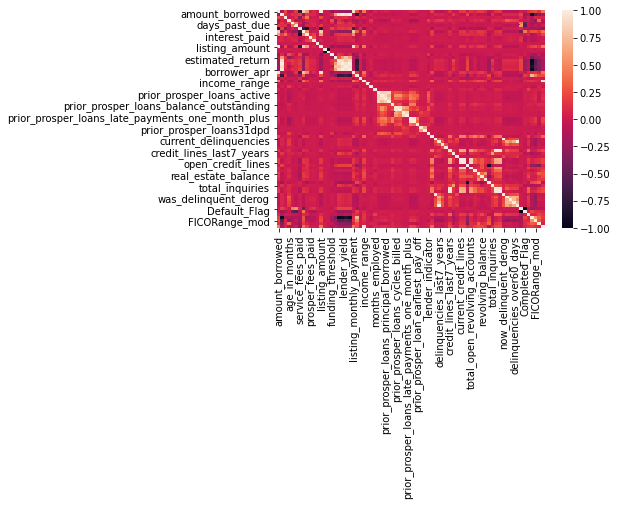

In [24]:
#Correlation Heatmap
_ = sns.heatmap(df.corr())

In [25]:
df.corr()

,amount_borrowed,borrower_rate,term,age_in_months,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,listing_amount,amount_remaining,percent_funded,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,prosper_score,listing_category_id,income_range,stated_monthly_income,dti_wprosper_loan,months_employed,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,Default_Flag,Completed_Flag,length_of_credit,prosper_rating_mod,FICORange_mod,ScorexRange_mod,income_range_description_mod
amount_borrowed,1.000000,-0.216366,0.243653,-0.109120,-0.040853,0.179571,-0.727026,0.829246,0.589064,0.001501,0.080692,0.003446,0.999808,0.006623,0.005368,-0.273402,-0.095504,-0.207550,-0.216510,-0.180383,-0.225367,0.940733,0.280461,-0.145546,0.430238,0.011234,-0.064647,0.056474,-0.010972,0.009473,0.057101,0.008666,-0.015737,-0.004265,-0.011141,0.005370,0.008612,0.089973,0.083619,0.031633,-0.005988,-0.003568,-0.035240,0.211059,-0.070405,-0.072385,-0.086989,-0.011508,0.129813,-0.020866,-0.011396,0.165507,0.170449,0.023139,0.143966,0.086642,0.176745,0.179676,0.104790,-0.039431,0.002148,0.129856,0.166889,-0.070405,-0.094632,-0.074604,-0.083862,-0.072385,0.012686,-0.012686,0.102953,0.196465,0.248210,0.139632,0.433095
borrower_rate,-0.216366,1.000000,0.116431,0.035479,0.140841,0.111788,0.180032,-0.285061,0.180561,0.086171,0.078489,-0.000536,-0.216456,-0.008145,-0.003722,0.100313,0.592449,0.927592,0.999984,0.944306,0.994612,-0.120878,-0.719841,0.038493,-0.148722,-0.002515,0.049769,-0.028326,-0.015856,-0.033677,-0.045875,-0.021397,-0.056228,-0.016865,-0.021267,0.002406,-0.002565,-0.072113,-0.070170,-0.036595,0.016418,0.010747,-0.020767,0.004036,0.084598,0.067188,0.077571,0.022822,-0.019970,0.159353,0.018058,-0.048083,-0.054253,0.212745,-0.067334,0.030438,-0.077731,-0.035862,-0.045839,-0.207060,0.123176,-0.019963,-0.060788,0.084598,0.093612,0.089593,0.083955,0.067188,0.216544,-0.216544,-0.079511,-0.934167,-0.522095,-0.323957,-0.154309
term,0.243653,0.116431,1.000000,-0.000364,0.019417,0.130414,-0.336042,0.131851,0.405469,-0.001249,0.016166,-0.002452,0.243696,0.006235,-0.003289,-0.108233,0.122681,0.088427,0.116298,0.139185,0.053635,-0.016015,0.109501,-0.016196,0.058517,-0.000596,-0.013631,0.022255,-0.008699,0.004559,0.009611,0.001126,-0.000579,-0.004716,-0.006475,-0.001297,-0.000196,0.011518,0.006727,0.012056,-0.001055,-0.000740,-0.028606,0.016655,-0.013640,0.005519,0.001331,-0.007086,0.043690,-0.001788,-0.003970,0.028323,0.030256,0.001627,0.017841,0.029408,0.025104,0.006105,0.010959,0.001921,-0.002513,0.043687,0.050192,-0.013640,0.004287,-0.003652,0.001059,0.005519,0.108993,-0.108993,0.020188,-0.121448,0.088188,0.060203,0.059890
age_in_months,-0.109120,0.035479,-0.000364,1.000000,0.179159,-0.122149,-0.047702,-0.077209,0.083487,0.062513,0.043534,0.017763,-0.108455,0.032188,-0.044532,0.269497,-0.265166,0.127831,0.036595,-0.114604,0.006387,-0.117246,-0.164524,0

Text(0.5, 0, 'Default Status')

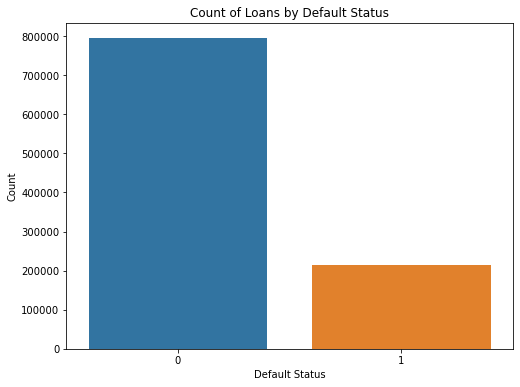

In [26]:
#Bar plot of Default vs Completed

counts = df.Default_Flag.value_counts()
Completed = counts[0]
Defaulted = counts[1]

plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Loans by Default Status')
plt.ylabel('Count')
plt.xlabel('Default Status')



In [27]:
#Total Loans Analyzed:
print(Completed+Defaulted)
#1,010,093

1010093


In [28]:
#% of Loans Defaulted:
print(Defaulted/(Completed+Defaulted))
#21.3%

0.21303087933487314


In [29]:
#Means:
df.groupby('Default_Flag').mean()

,amount_borrowed,borrower_rate,term,age_in_months,days_past_due,principal_balance,service_fees_paid,principal_paid,interest_paid,prosper_fees_paid,late_fees_paid,debt_sale_proceeds_received,listing_amount,amount_remaining,percent_funded,funding_threshold,estimated_return,estimated_loss_rate,lender_yield,effective_yield,borrower_apr,listing_monthly_payment,prosper_score,listing_category_id,income_range,stated_monthly_income,dti_wprosper_loan,months_employed,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loans_late_payments_one_month_plus,max_prior_prosper_loan,min_prior_prosper_loan,prior_prosper_loan_earliest_pay_off,prior_prosper_loans31dpd,prior_prosper_loans61dpd,lender_indicator,monthly_debt,current_delinquencies,delinquencies_last7_years,public_records_last10_years,public_records_last12_months,credit_lines_last7_years,inquiries_last6_months,amount_delinquent,current_credit_lines,open_credit_lines,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,real_estate_payment,revolving_available_percent,total_inquiries,total_trade_items,satisfactory_accounts,now_delinquent_derog,was_delinquent_derog,delinquencies_over30_days,delinquencies_over60_days,delinquencies_over90_days,Completed_Flag,length_of_credit,prosper_rating_mod,FICORange_mod,ScorexRange_mod,income_range_description_mod
Default_Flag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12847.558846,0.147939,41.688207,58.355462,0.005212,0.000009,-177.373482,12842.052061,2408.282999,2.761463,5.226036,0.000000,12852.543719,4.984873,0.999685,0.724519,0.069192,0.063376,0.137957,0.131912,0.178070,398.111816,7.122285,2.648033,4.312464,6816.958045,23348.302760,111.520682,0.170884,0.345603,4301.675119,1508.707610,514.219087,2.557922,2.364401,0.083236,0.015570,2919.676959,2551.646356,1.352986,0.00113,0.000425,0.022840,1030.650600,0.192828,2.355257,0.182434,0.003301,25.468929,1.014175,529.448636,10.721193,9.860888,0.547180,7.782248,26033.504041,115209.545745,17459.264872,917.582074,51.753823,4.554905,25.469442,23.270464,0.192828,1.324428,2.093552,0.970602,2.355257,1.0,6556.476884,4.666762,9.624290,2.421255,5.307691
1,13094.166516,0.183790,44.521087,58.916071,332.520943,4915.129778,-146.638164,4250.018811,2427.361710,6.691546,21.405474,1.378178,13098.960189,4.793673,0.999675,0.720996,0.078430,0.085680,0.173806,0.163453,0.215227,409.638706,6.000465,2.542697,4.078320,6239.417167,30514.263474,105.766406,0.124560,0.226572,2681.318743,1069.298997,435.170445,1.651229,1.563990,0.053490,0.007194,2102.338021,1902.513784,0.838155,0.00105,0.000381,0.013384,1008.386544,0.226256,2.507842,0.216237,0.004982,24.866959,1.199288,523.406625,10.728991,9.886723,0.566322,7.912437,25932.260841,100035.105990,15542.494421,807.760764,50.182242,5.151054,24.867182,22.555077,0.226256,1.390132,2.241703,1.053657,2.507842,0.0,6337.993666,3.817684,8.980844,2.274996,5.070029


Defaulted Loans have slightly lower amounts borrowed and a higher borrower rate. They also have more inquiries in the last 6 months, a lower real estate balance and finally more delinquencies across the board.  

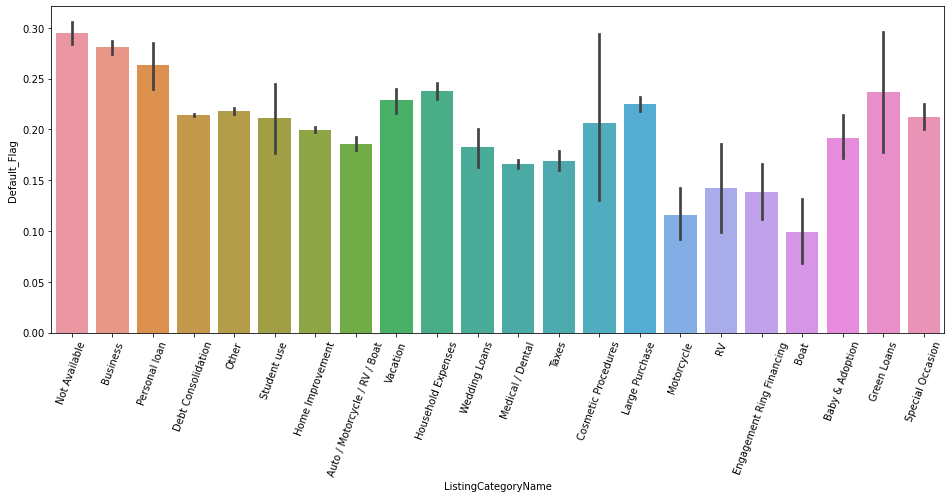

In [30]:
#Loan Types:
plt.figure(figsize=(16, 6))

sns.barplot(x='ListingCategoryName', y='Default_Flag', data=df)
plt.xticks(rotation=70)
plt.show()
#Source: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

Unavailable listing categories are the most likely to default, which could signal the importance of providing that data. Personal Loans, Businses Loans, Student Loans, and Green Loans have the next highest likelihood to default. 

Boat and Motorcycle loans were by far the lowest to default, followed by RVs and Engagement Ring Financing

In [31]:
#Cut Listing Categories Default Rates into 5 Bins - Very bad (1), bad, medium, good, very good(5))

#Calcualte mean of Default Rate
list_mean = df.groupby(['ListingCategoryName'])['Default_Flag'].mean()

#Cut into Bins (5 is lowest default rate). Save as DataFrame
list_bin = pd.DataFrame(pd.cut(list_mean, bins=5, labels=[5,4,3,2,1]))

#Rename column for joining
list_bin.columns = [ 'ListingCategoryName_mod']

#Join into master dataset
df = pd.merge(df, list_bin, on='ListingCategoryName')

#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

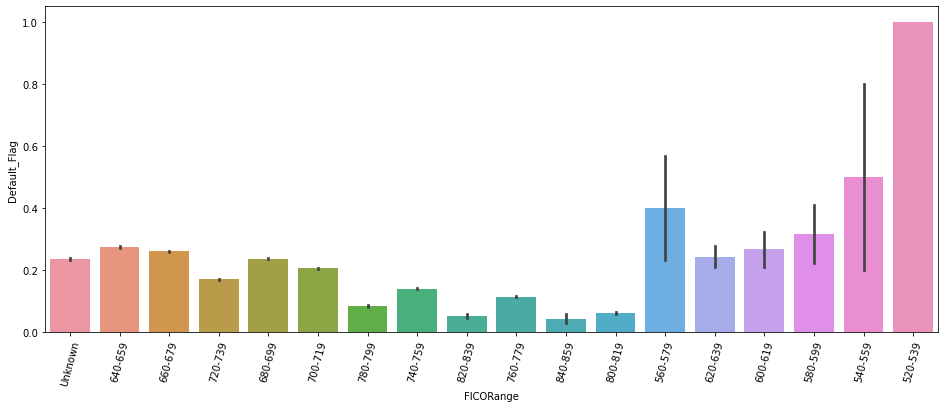

In [33]:
#Credit Scores: FICO
plt.figure(figsize=(16, 6))

sns.barplot(x='FICORange', y='Default_Flag', data=df)
plt.xticks(rotation=75)
plt.show()

FICO seems to be a pretty good predictor of defaults, with scores below 600 being much more likely to default, and scores close to and above 800 having extremely low default ranges. Unknown scores were middle of the pack, so could possibly have been given the mode instead of Unknown.

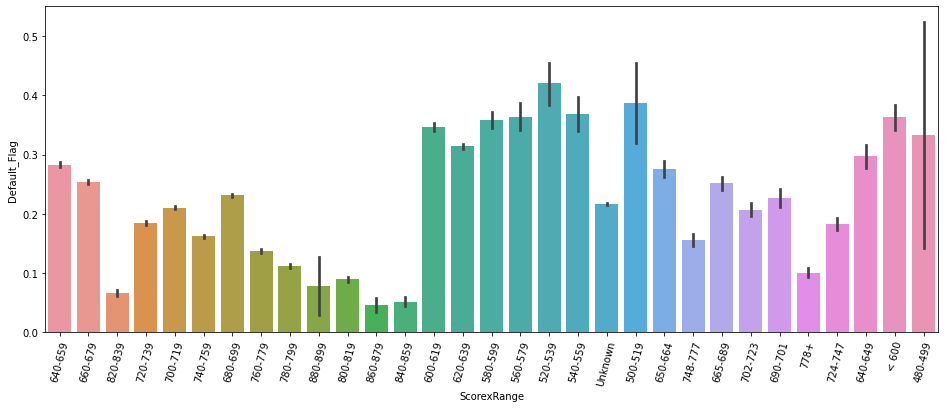

In [34]:
#Credit Scores: Scorex
plt.figure(figsize=(16, 6))

sns.barplot(x='ScorexRange', y='Default_Flag', data=df)
plt.xticks(rotation=75)
plt.show()

Scorex similarly seems to be a good predictor, following the same pattern as FICO. Because of this, I may just use FICO, since it has far more values, whereas Scorex was missing around 1/3rd. 

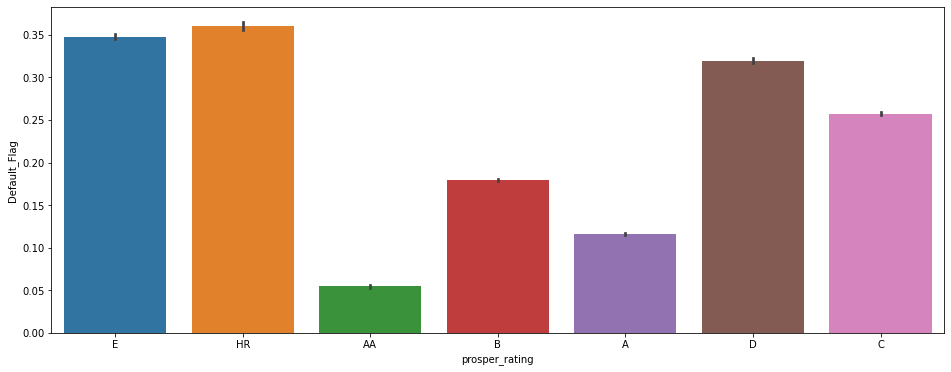

In [35]:
#Prosper Ratings:
plt.figure(figsize=(16, 6))

sns.barplot(x='prosper_rating', y='Default_Flag', data=df)

plt.show()


Unsurprisingly, the Prosper Ratings become more likely to default the lower quality they are. 

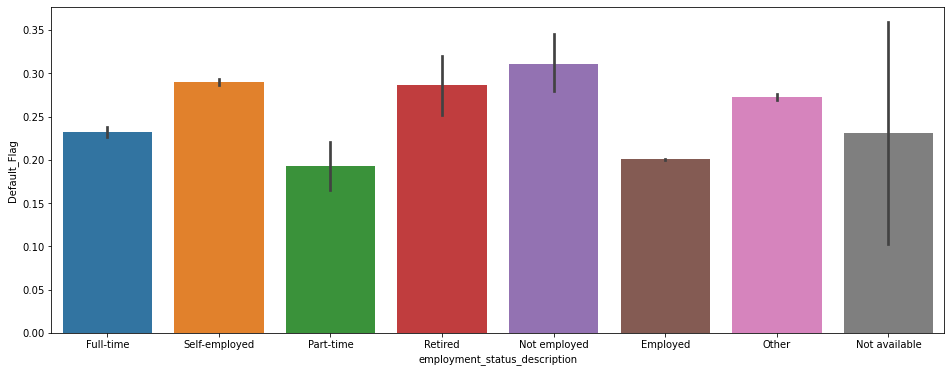

In [36]:
#Employment:
plt.figure(figsize=(16, 6))

sns.barplot(x='employment_status_description', y='Default_Flag', data=df)

plt.show()

Retired and unemployed employment statuses are most likely to default, besides unavailable.

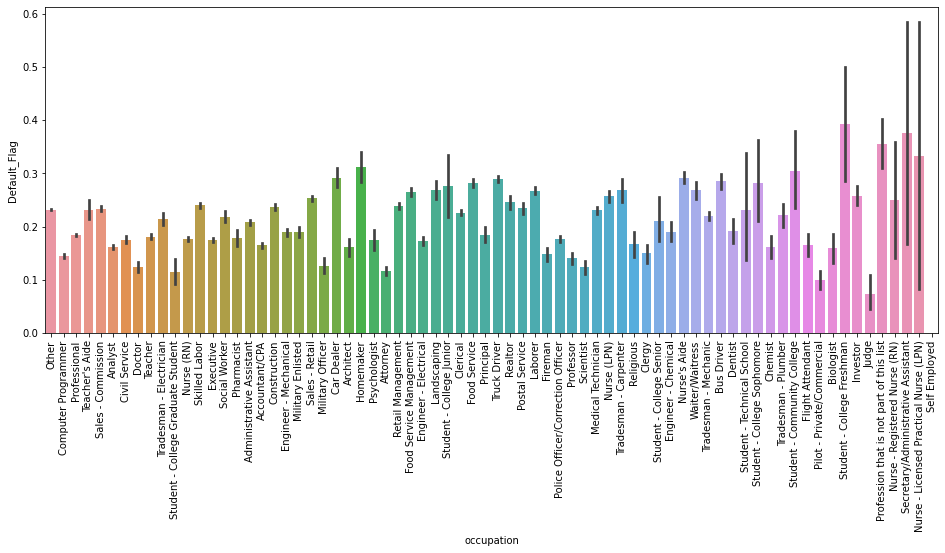

In [37]:
plt.figure(figsize=(16, 6))

sns.barplot(x='occupation', y='Default_Flag', data=df)
plt.xticks(rotation=90)

plt.show()

Freshmen Undergrad Students, Secretaries, and Unlisted Professions defualted the most, while Computer Progreammers, Doctors, Grad Students, Military Officers, Attorneys, Scientists, Pilots, and Judges were the least likely to default. 

In [38]:
#Cut Occupations Default Rates into 5 Bins - Very bad (1), bad, medium, good, very good(5))

#Calcualte mean of Default Rate
occ_mean = df.groupby(['occupation'])['Default_Flag'].mean()

#Cut into Bins (5 is lowest default rate)
pd.cut(occ_mean, bins=5, labels=[5,4,3,2,1])

#Save as DataFrame
occ_bin = pd.DataFrame(pd.cut(occ_mean, bins=5, labels=[5,4,3,2,1]))

#Rename column for joining
occ_bin.columns = [ 'occupation_mod']

#Join into master dataset
df = pd.merge(df, occ_bin, on='occupation')


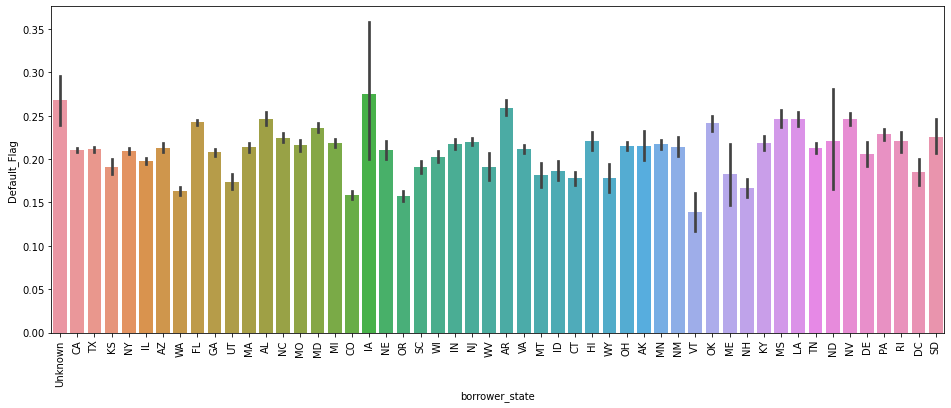

In [39]:
#Borrower State
plt.figure(figsize=(16, 6))

sns.barplot(x='borrower_state', y='Default_Flag', data=df)
plt.xticks(rotation=90)

plt.show()

There appears to be a pretty wide variance in default rates across states. Standouts in terms of good default rates are WA, CO, OR, and VT, while poor performers include IA, AR, and Unknown.

In [40]:
#Cut Borrower States Default Rates into 5 Bins - Very bad (1), bad, medium, good, very good(5))

#Calcualte mean of Default Rate
state_mean = df.groupby(['borrower_state'])['Default_Flag'].mean()

#Cut into Bins (5 is lowest default rate)
pd.cut(state_mean, bins=5, labels=[5,4,3,2,1])

#Save as DataFrame
state_bin = pd.DataFrame(pd.cut(state_mean, bins=5, labels=[5,4,3,2,1]))

#Rename column for joining
state_bin.columns = [ 'borrower_state_mod']

#Join into master dataset
df = pd.merge(df, state_bin, on='borrower_state')


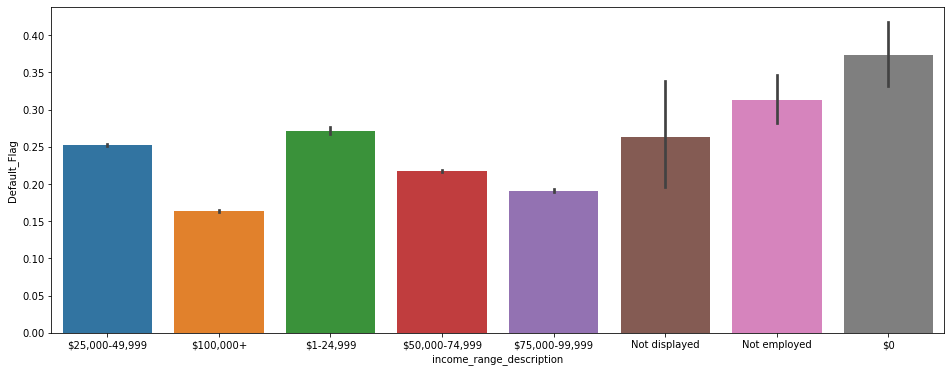

In [41]:
#Income:
plt.figure(figsize=(16, 6))

sns.barplot(x='income_range_description', y='Default_Flag', data=df)

plt.show()

Income levels appear to have a linear in terms of relationship with Default Rates.

Text(0, 0.5, 'Default_Flag')

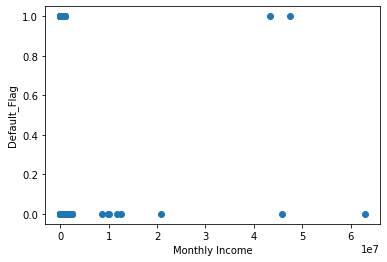

In [42]:
X = df["stated_monthly_income"].values.reshape(-1,1)
Y = df["Default_Flag"].values.reshape(-1,1)

LogR = LogisticRegression()
LogR.fit(X,np.ravel(Y.astype(int)))

#matplotlib scatter funcion w/ logistic regression
plt.scatter(X,Y)
plt.xlabel("Monthly Income")
plt.ylabel("Default_Flag")

### Goal Accuracy

In [114]:
#Loan Size:

#Calcualte mean of Loan Amount
loan_mean = df['amount_borrowed'].mean()

print(round(loan_mean,2))

12900.09


In [115]:
#Borrower Rate:

#Calcualte mean of Borrower Rate
rate_mean = df['borrower_rate'].mean()

print(round(rate_mean,2))

0.16


In [116]:
#Avg Return for Completed Loans: 
avg_ret = loan_mean * rate_mean

print(round(avg_ret,2))

2006.95


In [135]:
#Break-even point
#Assuming X amount of loans complete and the X+1 loan defaults, calculate ideal return:
#avg_return * X - loan_mean * 1 = 0
#2006.96 * X = 12900.09
#X = 6.43
#6.43 completed loans needed for every 1 defaulted loan


acc_ideal = round((loan_mean / avg_ret) / (loan_mean / avg_ret+ 1),2)

print("Ideal accuracy: ", acc_ideal)

Ideal accuracy:  0.87


While an 86.5% accuracy would be ideal, in reality most loans that default still return some of the capital as well as interest, fees, and sell-offs. Because of this, 

In [130]:
#From the means calculations, calculate returns for each default_flag:
#Calculation: 
#(Principal Paid - Amount Borrowed) + Interest + Late Fees + Debt Sale Proceeds

#Completed Loans:
comp_loans = round((12842.05 - 12847.56) + 2408.28 + 5.23 + 0,2)
print("Avg return for completed loans: ", comp_loans)

#Defaulted Loans:
def_loans = round((4250.02 - 13094.17) + 2427.36 + 21.41 + 1.38,2)
print("Avg return for defaulted loans: ", def_loans)




Avg return for completed loans:  2408.0
Avg return for defaulted loans:  -6394.0


In [138]:
#Assuming X amount of loans complete and the X+1 loan defaults, calculate ideal return:
#completed_return * X - defaulted_return * 1 = 0
#2408.0 * X = 6394.0
#X = 2.66
#2.66 completed loans needed for every 1 defaulted loan

acc_ideal_mod = round((def_loans * -1 / comp_loans) / (def_loans * -1 / comp_loans + 1) ,2)

print("Ideal accuracy modified: ", acc_ideal_mod)

Ideal accuracy:  0.73


Based on the means, the true break-even point of classifying loans is 73%. That can be achieved by investing in every possible loan, which historically would lead to an 79% accuracy rate. The goal, then, is to beat 79%, at least in terms of Precision of Completed Loand.

This would lead to a score requirement of True Negatives / (False Negatives + True Negatives) > 79%. 

We want to correctly predict any amount of loans in which to invest, while minimizing the investments made in loans that end up defaulting. 

In [46]:
#Export file for faster processing
#cols=[]
df.to_csv('df_clean.csv',index=False)#, columns=cols)

# Prepare Data for Modeling

In [2]:
#Read in CSV
df_clean = pd.read_csv('df_clean.csv', index_col=False, header=0)

In [3]:
#Use One Hot Encoding for object columns
#Employment Status Description
dum = pd.get_dummies(df_clean['employment_status_description'], prefix='Employment')
df_clean = df_clean.join(dum)

#Source: https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [4]:
#Drop object columns, which have already been converted to integers
df_clean = df_clean.drop(columns=['income_range_description','prosper_rating','FICORange','ScorexRange','ListingCategoryName',
                                  'employment_status_description','occupation','borrower_state','borrower_city',
                                  'investment_type_description','debt_sale_proceeds_received','occupation','borrower_state',
                                  'listing_category_id','income_range'])



In [5]:
#Drop columns which do not become available until loan is closed
df_clean = df_clean.drop(columns=['days_past_due','principal_balance','service_fees_paid','principal_paid','interest_paid',
                                  'prosper_fees_paid','late_fees_paid','amount_remaining','Completed_Flag'])

In [6]:
#Remove colinear variables (perfectly correlated with each other)
cols = ['lender_yield','borrower_apr','listing_amount','total_trade_items','satisfactory_accounts',
        'now_delinquent_derog','delinquencies_over90_days']

for col in cols:
    df_clean = df_clean.drop(columns=col)

In [7]:
#Remove colinear variables part 2 (>92% correlation with each other)
cols = ['credit_lines_last7_years','open_credit_lines','prior_prosper_loans_cycles_billed','prior_prosper_loans_principal_borrowed','min_prior_prosper_loan','estimated_loss_rate','effective_yield','listing_monthly_payment']

for col in cols:
    df_clean = df_clean.drop(columns=col)

In [8]:
#Remove noncorrelated variables (<.001 correlation with Default_Flag)
cols = ['current_credit_lines']

for col in cols:
    df_clean = df_clean.drop(columns=col)

# Split X and Y, Scale Variables

In [9]:
#Define dependent and independent variables (final column is Default_Flag)
X = df_clean.loc[:, df_clean.columns != 'Default_Flag']
y = df_clean.loc[:, df_clean.columns == 'Default_Flag']

In [10]:
X.head()

,amount_borrowed,borrower_rate,term,age_in_months,percent_funded,funding_threshold,estimated_return,prosper_score,stated_monthly_income,dti_wprosper_loan,...,occupation_mod,borrower_state_mod,Employment_Employed,Employment_Full-time,Employment_Not available,Employment_Not employed,Employment_Other,Employment_Part-time,Employment_Retired,Employment_Self-employed
0,4800.0,0.1248,36,167,1.0,1.0,-0.1452,6.0,3330.1667,0.23,...,3,1,0,1,0,0,0,0,0,0
1,25000.0,0.1794,36,167,1.0,1.0,-0.4906,1.0,10250.0000,0.10,...,3,1,0,0,0,0,0,0,0,1
2,2800.0,0.1189,36,167,1.0,1.0,-0.5511,1.0,2500.0000,0.06,...,3,1,0,1,0,0,0,0,0,0
3,5000.0,0.1300,36,166,1.0,1.0,-0.0500,7.0,1166.6667,0.35,...,3,1,0,1,0,0,0,0,0,0
4,4000.0,0.1675,36,166,1.0,1.0,-0.0125,8.0,5813.3333,0.34,...,3,1,0,1,0,0,0,0,0,0


In [11]:
#Scale values for better comparison in model
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.MinMaxScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,amount_borrowed,borrower_rate,term,age_in_months,percent_funded,funding_threshold,estimated_return,prosper_score,stated_monthly_income,dti_wprosper_loan,...,occupation_mod,borrower_state_mod,Employment_Employed,Employment_Full-time,Employment_Not available,Employment_Not employed,Employment_Other,Employment_Part-time,Employment_Retired,Employment_Self-employed
283145,0.199205,0.375143,0.5,0.373494,0.96,0.0,0.762944,0.6,0.000061,1.700000e-07,...,0.50,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175714,0.487179,0.231143,0.5,0.475904,0.96,0.0,0.747960,0.9,0.000166,1.700000e-07,...,0.50,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301319,0.025641,0.847143,0.5,0.174699,0.96,1.0,0.842139,0.3,0.000132,2.600000e-07,...,0.75,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254380,0.102564,0.631429,0.5,0.885542,0.96,1.0,0.581040,0.4,0.000092,8.000000e-08,...,0.50,0.50,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
915071,0.128205,0.772571,0.5,0.415663,0.96,0.0,0.802067,0.2,0.000066,4.200000e-07,...,0.50,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Analyze Features

### Recursive Feature Elimination

In [12]:
# Look at many iterations of all features to determine the 20 that are most important
logreg = LogisticRegression(max_iter=20000)

rfe = RFE(logreg, n_features_to_select=20, step=10)

In [13]:
rfe = rfe.fit(X_scaled, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False  True False False False False  True False False False  True
  True  True False  True  True False False False False False False  True
  True False False  True  True False  True  True  True  True  True False
 False  True  True False False False False  True False False False False
 False False False False False False False False False]
[1 3 1 4 4 4 3 1 5 4 2 1 1 1 2 1 1 5 5 3 5 5 4 1 1 5 4 1 1 3 1 1 1 1 1 4 5
 1 1 4 2 5 3 1 2 2 3 2 3 5 4 2 5 3 4 3 3]


Originally ran this RFE portion with all One-Hot-Encoded variables for Borrower State, Occupation, and Listing Category Name. This resulted in hundreds of columns and showed many of the new one-hot-encoded variables to be more important than many inherent variables in the dataset. Since these will not always be available when identifying a new loan (52 State values, 22 Category values, 72 Occupation values), I instead group them into integer bins, and only Employment is One-Hot-Encoded. 

In [14]:
#Extract most important features
rfe_cols = rfe.get_support(1) 

In [15]:
#Define dependent and independent variables with RFE columns (final column is Default_Flag)
X_scaled_rfe = X_scaled[X_scaled.columns[rfe_cols]] 
y = df_clean.loc[:, df_clean.columns == 'Default_Flag']

In [16]:
X_scaled_rfe.head()

,amount_borrowed,term,prosper_score,prior_prosper_loans_active,prior_prosper_loans,prior_prosper_loans_principal_outstanding,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,monthly_debt,current_delinquencies,public_records_last12_months,inquiries_last6_months,bankcard_utilization,total_open_revolving_accounts,installment_balance,real_estate_balance,revolving_balance,total_inquiries,was_delinquent_derog,FICORange_mod
0,0.097436,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.001716,0.000000,0.0,0.015873,0.149580,0.106667,0.006197,0.000000,0.002303,0.012658,0.044444,0.3125
1,0.615385,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000342,0.018182,0.0,0.063492,0.166387,0.080000,0.001273,0.018288,0.002370,0.069620,0.133333,0.3125
2,0.046154,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000144,0.018182,0.0,0.063492,0.063866,0.066667,0.000005,0.000000,0.000423,0.031646,0.066667,0.3125
3,0.102564,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.000676,0.000000,0.0,0.000000,0.047059,0.066667,0.009134,0.000000,0.001330,0.018987,0.000000,0.3125
4,0.076923,0.5,0.7,0.0,0.0,0.0,0.0,0.0,0.005216,0.000000,0.0,0.047619,0.126050,0.053333,0.002666,0.000000,0.016175,0.031646,0.000000,0.3125


In [18]:
#Test the original full column list
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
columns = X_train.columns

logreg = LogisticRegression(max_iter = 20000, class_weight = 'balanced') 
logreg.fit(X_train, y_train.values.ravel())

y_pred = logreg.predict(X_test)
print('X_scaled: Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
#.60 without scaled data, .6353 with scaled data

X_scaled: Accuracy of logistic regression classifier on test set: 0.6353


Initial accuracy score with only scaling applied to dataset resulted in 63.5%. 

I tested several iterations of RFE to try and find the optimal number of features. The best I could find was 20 features. The reason I did not utilize the hyperparameter optimization method towards the end of this section is because my computer couldn't handle the processing. 

Reducing the dataset to the 5 most important variables reduced the accuracy to 50.6%

Increasing the dataset to the 10 most important variables improved accuracy by 5 points, but still performed 8 points worse than using the entire dataset.

Using 20 features got close to the performance of using all of them, at 62.2%.

This performed within .3% of the original Logistic Regression. Since it performed better than 20 features, hopefully something around this will prove to be optimal.

At 0.6334, this was better than 20, worse than 47.

The model with 47 features performed at 0.6352, compared to the unadjusted model performance of 0.6353. I think that difference of .01% should be pretty negligible, at least in terms of the tradeoff in model run time by removing 10 features.



Overall, the lower number of features are the worst performers in terms of how they improve model performance.

### Principal Component Analysis

In [55]:
#Define dependent and independent variables with all columns (final column is Default_Flag)
X_scaled = X_scaled.loc[:, X_scaled.columns != 'Default_Flag']
y = df_clean.loc[:, df_clean.columns == 'Default_Flag']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
columns = X_train.columns

In [18]:
#Convert values to Principal Components
pca = PCA(n_components=1)
X_scaled_pca = pca.fit_transform(X_scaled)


#Source: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [57]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.23807836e-01 1.67298240e-01 9.26003439e-02 7.60114044e-02
 6.03648210e-02 5.17715261e-02 4.25896686e-02 3.66624168e-02
 3.54380263e-02 2.77067320e-02 2.45329811e-02 2.17145162e-02
 1.86514624e-02 1.70183008e-02 1.57823984e-02 1.40549378e-02
 1.27104286e-02 1.21733167e-02 8.45839879e-03 6.74821212e-03
 6.12085514e-03 5.74749944e-03 3.47755533e-03 3.47544182e-03
 2.32951075e-03 2.29384668e-03 2.25389330e-03 1.29007974e-03
 9.61911264e-04 8.13183229e-04 7.77063681e-04 7.47845423e-04
 6.13025548e-04 4.88233288e-04 3.86523509e-04 3.44694677e-04
 3.07512901e-04 2.76619116e-04 2.61209432e-04 1.99459767e-04
 1.65433552e-04 1.08591849e-04 9.86908491e-05 7.35920532e-05
 6.11516487e-05 4.56325548e-05 4.42011324e-05 4.12330360e-05
 3.80202424e-05 2.79950479e-05 1.26999260e-05 7.45879352e-06
 4.61687382e-06 3.27727173e-06 2.92824794e-06 2.54427613e-06
 6.61530337e-32]


Applying PCA to just the RFE columns led to one component that explained 99.999% of the variance, with everything else not making any difference. 

[9.99997192e-01 1.55127853e-06 4.56722603e-07 3.03078683e-07
 2.01575565e-07 1.25428586e-07 4.60349637e-08 3.67244642e-08
 3.46111733e-08 2.08162644e-08 2.04389799e-08 5.88337852e-09
 2.73903157e-09 9.37124868e-10 8.03217763e-10 2.54623386e-10
 1.20176960e-10 1.17406572e-10 3.61490832e-11 1.20852492e-11]
 
 Applying PCA to all columns led to a more balanced approach, with the highest explained variance at 22%.
 
 [2.23983902e-01 1.67354020e-01 9.25318045e-02 7.62238542e-02
 6.03171926e-02 5.17111236e-02 4.25739114e-02 3.66037709e-02
 3.54459520e-02 2.76652759e-02 2.45211308e-02 2.16678803e-02
 1.86437435e-02 1.70114830e-02 1.57504548e-02 1.40518544e-02
 1.26837889e-02 1.21453464e-02 8.45320016e-03 6.73108102e-03
 6.11033253e-03 5.73025829e-03 3.47887168e-03 3.46703648e-03
 2.35389274e-03 2.29957307e-03 2.25853068e-03 1.29987203e-03
 9.66219562e-04 8.04149440e-04 7.82915799e-04 7.55284988e-04
 6.13372175e-04 4.89564015e-04 3.76547303e-04 3.45234141e-04
 3.08739485e-04 2.75952581e-04 2.62048150e-04 1.99694459e-04
 1.65256085e-04 1.11001422e-04 9.84289977e-05 7.49976024e-05
 5.79224915e-05 5.33762481e-05 4.59189633e-05 4.18733610e-05
 3.86146185e-05 2.78901160e-05 1.18967213e-05 8.29423690e-06
 4.77861954e-06 4.09315302e-06 3.70485530e-06 3.09211721e-06
 4.41730359e-32]



The same Logistic Regression model performed 1 point worse than the original scaled dataset at 62.3%.

In [22]:
#PCA with 1 component

pca = PCA(n_components=1)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

logreg = LogisticRegression(max_iter = 20000, class_weight = 'balanced')
logreg.fit(X_pca_train, y_train.values.ravel())

y_pred = logreg.predict(X_pca_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_pca_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

Accuracy of logistic regression classifier on test set: 0.6699
[[179715  58987]
 [ 41033  23293]]


Using just 1 component improved the accuracy to 66.99%.

Performance did not improve past the 1 principal component. 

### SMOTE

Synthetic Minority Oversampling Technique (SMOTE) is a technique for adding to the sample of an underrepresented class, which attempts to solve the imbalanced data issue. Since this seems to be the biggest issue I have been facing, I will test using SMOTE to improve my model performance. 

In [ ]:
#Source: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [35]:
#oversample the minority class (Defaults)
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)
# summarize the new class distribution
counts = y_smote.value_counts()
print(counts)


Default_Flag
1               794912
0               794912
dtype: int64


# Logistic Regression

In [104]:
#Source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [28]:
#PCA 

X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter = 20000, class_weight = 'balanced')
logreg.fit(X_train, y_train.values.ravel())

y_pred = logreg.predict(X_test)
#Evaluate results
print('Accuracy of Logistic Regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression classifier on test set: 0.6356
[[99642 59486]
 [14139 28752]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73    159128
           1       0.33      0.67      0.44     42891

    accuracy                           0.64    202019
   macro avg       0.60      0.65      0.58    202019
weighted avg       0.76      0.64      0.67    202019



Interpretation:

Predicted 0   Predicted 1
        
Actual            0             0

Actual            1             1

Running with class_weight = 'auto':

This indicates that there were 238,697 True Negatives (Top Left), 2 True Positives (Bottom Right), 5 False Negatives (Top Right), and 64324 False Positives (Bottom Left). In terms of return on investment, this would work quite well by being overly conservative. However, the model is not doing a good job of identifying any True Negatives. The 2nd column, Actual Negatives, only adds up to 7, which can't be right. It seems like it's just predicting 0 for everything.

Running with class_weight = 'balanced':

This indicates that there were 147,299 True Positives (Top Left), 38,049 True Negatives (Bottom Right), 91,403 False Positives (Top Right), and 26,277 False Negatives (Bottom Left). While this performs worse than the other model, at least it properly allocates some predictions to Defaults properly, compared to only 2 on the previous model. 

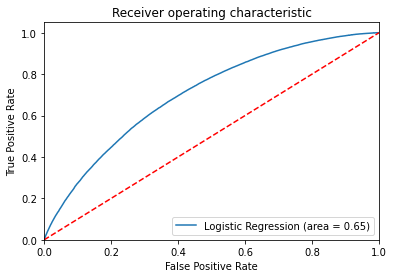

In [32]:
#ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# KNN

In [ ]:
#Source: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [49]:
#Build KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train, y_train.values.ravel())

KNeighborsClassifier()

In [51]:
#Predict results from test set
y_pred = knn.predict(X_pca_test)

In [32]:
#SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smt = SMOTE(random_state=0)
X_train, y_train = smt.fit_resample(X_train, y_train)

#Build KNN Model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train.values.ravel())


y_pred = knn.predict(X_test)
print('Accuracy of knn classifier on test set: {:.4f}'.format(knn.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Accuracy of knn classifier on test set: 0.6311
[[106305  52823]
 [ 21702  21189]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74    159128
           1       0.29      0.49      0.36     42891

    accuracy                           0.63    202019
   macro avg       0.56      0.58      0.55    202019
weighted avg       0.71      0.63      0.66    202019



In [60]:
#Look at various K values between 1 and 40
error = []

#Calculate error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_pca_train, y_train.values.ravel())
    pred_i = knn.predict(X_pca_test)
    error.append(np.mean(pred_i != y_test.values.ravel())) #issue with this line...added .values.ravel()

The y_train.values.ravel() is used because of the following error: 

DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)

Text(0, 0.5, 'Mean Error')

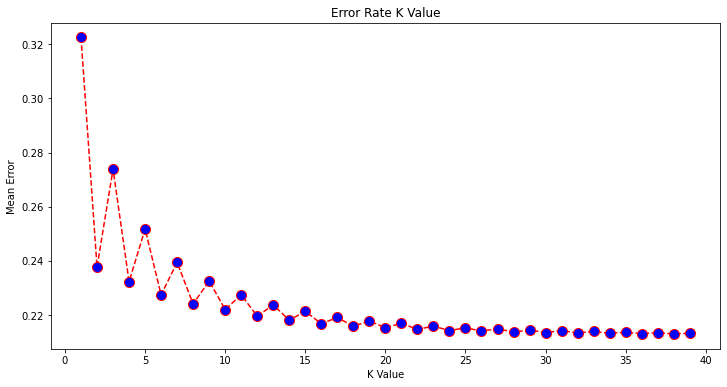

In [61]:
#Plot error values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Additional clusters keep performing better in terms of error rate. Almost everything after 18 does not provide much improvement, and it would do so at a processing time cost. 

Using 6 Clusters instead of 5 provides a huge boost in performance at 77.3% accuracy without sacrificing very much additional complexity or run-time. 

Using the lowest error rate for determing a cluster leads to high accuracy, but the model does not really pick very many Defaults at all. This is a problem, because choosing too many Completed loans would be an issue in the real world.

# Decision Tree

In [ ]:
#Create initial Decision Tree model
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

#Source: https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

Interestingly, a decision tree model with no configurations whatsoever performs better than my Logistic Regression model that has parameters tuned. 

In [21]:
#RFE
X_train, X_test, y_train, y_test = train_test_split(X_scaled_rfe, y, test_size=0.2, random_state=42)

#Create initial Decision Tree model
dtree = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)


print('Accuracy of Decision Tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on test set: 0.6597
[[116376  42752]
 [ 26001  16890]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.77    159128
           1       0.28      0.39      0.33     42891

    accuracy                           0.66    202019
   macro avg       0.55      0.56      0.55    202019
weighted avg       0.70      0.66      0.68    202019



# Random Forest

In [83]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')
rf.fit(X_pca_train, y_train.values.ravel())

In [84]:
# Train the model on training data
rf.fit(X_pca_train, y_train.values.ravel())

RandomForestClassifier(class_weight='balanced', random_state=42)

In [85]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_pca_test)

# Calculate the absolute errors
errors = abs(y_pred - y_test.values.ravel())

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.33 degrees.


In [34]:
#SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smt = SMOTE(random_state=0)
X_train, y_train = smt.fit_resample(X_train, y_train)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')
rf.fit(X_train, y_train.values.ravel())

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(rf.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))



Accuracy of Random Forest classifier on test set: 0.7733
[[148909  10219]
 [ 35572   7319]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87    159128
           1       0.42      0.17      0.24     42891

    accuracy                           0.77    202019
   macro avg       0.61      0.55      0.55    202019
weighted avg       0.72      0.77      0.73    202019



# TPOT

Now that several models have been tested, I will run a Machine Learning automation tool called TPOT (Tree-Based Pipeline Optimization Tool). TPOT uses stochastic search algorithms to determine the optimal ML algorithm to use on your dataset, based on the parameters that you provide. 

Conveniently, TPOT uses sklearn to develop its models, so the output will be similar to all of the other modeling I have done above.  

The data I fed into this TPOT model was simply the Scaled features prior to any feature engineering, such as RFE and PCA. 

A major downside of TPOT is the time which it takes to run. The below instance of TPOT is pretty scaled down, using 5 generations instead of the default of 100, and 50 population_size instead of the default of 100. Even this took >6 hours to run on my machine. Trying to run with the defaults would likely lead to much higher accuracy, but I estimated it would take around 27 days to complete. In order to get the full potential from this algorithm, a machine with optimal compute power should be used. 

That being said, even the scaled down version greatly improved the accuracy of the models I was able to come up with on my own.

### Initial TPOT Model

In [ ]:
#Performed install in command line
#conda install tpot

In [131]:
#Model Evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [27]:
#PCA

X_train, X_test, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')
rf.fit(X_train, y_train.values.ravel())

# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(rf.score(X_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on test set: 0.6719
[[124912  34216]
 [ 32067  10824]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79    159128
           1       0.24      0.25      0.25     42891

    accuracy                           0.67    202019
   macro avg       0.52      0.52      0.52    202019
weighted avg       0.68      0.67      0.67    202019



In [132]:
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, 
                       random_state=1, n_jobs=-1)

In [133]:
# perform the search
model.fit(X, y.values.ravel())
# export the best model
model.export('tpot_best_model.py')

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.7872341129483562

Generation 2 - Current best internal CV score: 0.7872341129483562

Generation 3 - Current best internal CV score: 0.7872341129483562

Generation 4 - Current best internal CV score: 0.7872341129483562

Generation 5 - Current best internal CV score: 0.7872341129483562

Best pipeline: DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=7, min_samples_leaf=16, min_samples_split=11)


generations=5, population_size=50:

5:38:15<5:38:24, 120s/pipeline]

generations=100, population_size=100:

7:38:15<642:18:24, 231.25s/pipeline]

### Optimized Decision Tree

Based on TPOT output

In [56]:
#Create new Decision Tree model using parameters from TPOT
dtree_tpot = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=16, min_samples_split=11,
                                   random_state=42) 
dtree_tpot.fit(X_pca_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=16,
                       min_samples_split=11, random_state=42)

In [57]:
y_pred = dtree_tpot.predict(X_pca_test)

In [58]:
print('Accuracy of Decision Tree TPOT classifier on test set: {:.4f}'.format(dtree_tpot.score(X_pca_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Accuracy of Decision Tree TPOT classifier on test set: 0.7877
[[238680     22]
 [ 64317      9]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88    238702
           1       0.29      0.00      0.00     64326

    accuracy                           0.79    303028
   macro avg       0.54      0.50      0.44    303028
weighted avg       0.68      0.79      0.69    303028



Now that the full results are displayed, it is clear that TPOT provided a very high accuracy at the expense of ever predicting any Defaults of any meaningful amount. This is not particularly helpful, so I will run TPOT with a balanced class weight.

In [96]:
#Create new Decision Tree model using parameters from TPOT
dtree_tpot = DecisionTreeClassifier(criterion="entropy", max_depth=7, min_samples_leaf=16, min_samples_split=11,
                                   random_state=42, class_weight = 'balanced')
#add class_weight = balanced
dtree_tpot.fit(X_pca_train, y_train)

y_pred = dtree_tpot.predict(X_pca_test)

print('Accuracy of Decision Tree TPOT classifier on test set: {:.4f}'.format(dtree_tpot.score(X_pca_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Accuracy of Decision Tree TPOT classifier on test set: 0.5445
[[120481 118221]
 [ 19807  44519]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.64    238702
           1       0.27      0.69      0.39     64326

    accuracy                           0.54    303028
   macro avg       0.57      0.60      0.51    303028
weighted avg       0.73      0.54      0.58    303028



In [101]:
#Create new Decision Tree model using parameters from TPOT
dtree_tpot = DecisionTreeClassifier(criterion="entropy", max_depth=9, min_samples_leaf=1, min_samples_split=16,
                                   random_state=42, class_weight = 'balanced')
#add class_weight = balanced
dtree_tpot.fit(X_pca_train, y_train)

y_pred = dtree_tpot.predict(X_pca_test)

print('Accuracy of Decision Tree TPOT classifier on test set: {:.4f}'.format(dtree_tpot.score(X_pca_test, y_test)))

cm = confusion_matrix(y_test,y_pred)
print(cm)

print(classification_report(y_test, y_pred))

Accuracy of Decision Tree TPOT classifier on test set: 0.5572
[[125849 112853]
 [ 21335  42991]]
              precision    recall  f1-score   support

           0       0.86      0.53      0.65    238702
           1       0.28      0.67      0.39     64326

    accuracy                           0.56    303028
   macro avg       0.57      0.60      0.52    303028
weighted avg       0.73      0.56      0.60    303028

